<a href="https://colab.research.google.com/github/Get-the-CODE/Machine-Learning-codes/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ICRISAT Weather 1978 to 2018.xlsx to ICRISAT Weather 1978 to 2018.xlsx


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_excel('ICRISAT Weather 1978 to 2018.xlsx')

In [34]:
df.head()

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
3604,ICRISAT,1987-11-14,20.8,19.6,98,98.0,13.3,37.4,0.0,0.4,1.8,0.4,17.508409,78.2723,803.7
10164,ICRISAT,2005-10-30,22.8,20.2,100,100.0,9.4,11.8,0.0,2.0,2.5,0.4,17.508409,78.2723,1191.0
10443,ICRISAT,2006-08-05,23.0,21.2,96,98.0,21.3,91.4,0.0,2.5,1.6,0.4,17.508409,78.2723,550.8
8271,ICRISAT,2000-08-24,23.4,18.5,98,98.0,14.6,246.2,0.0,0.8,2.0,0.4,17.508409,78.2723,1309.6
6814,ICRISAT,1996-08-28,23.5,21.5,97,98.0,13.9,107.0,0.0,1.6,1.9,0.4,17.508409,78.2723,790.8


# Description of Columns

1. **Station**:
   - The identifier for the weather station where the data was collected.

2. **Date**:
   - The date on which the weather data was recorded.

3. **MaxT (Maximum Temperature)**:
   - The highest temperature recorded on that day.

4. **MinT (Minimum Temperature)**:
   - The lowest temperature recorded on that day.

5. **RH1 (Relative Humidity 1)**:
   - Relative humidity at a specific time of the day, often in the morning.

6. **RH2 (Relative Humidity 2)**:
   - Relative humidity at a different time of the day, often in the afternoon.

7. **Wind**:
   - The average wind speed for the day.

8. **Rain**:
   - The amount of rainfall recorded for the day.

9. **SSH (Sunshine Hours)**:
   - The total number of hours of sunshine received during the day.

10. **Evap (Evaporation)**:
    - The amount of water evaporated from a standard pan or a specified area.

11. **Radiation**:
    - The amount of solar radiation received during the day.

12. **FAO56_ET (FAO-56 Evapotranspiration)**:
    - The estimated amount of water lost through evaporation and plant transpiration.

13. **Lat (Latitude)**:
    - The geographic latitude of the weather station.

14. **Lon (Longitude)**:
    - The geographic longitude of the weather station.

15. **Cum_Rain (Cumulative Rainfall)**:
    - The total cumulative amount of rainfall over a specified period up to the current date.

In [ ]:
# Sort DataFrame by 'FAO56_ET' column in ascending order
df = df.sort_values(by='FAO56_ET')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14853 entries, 3604 to 6364
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Station    14853 non-null  object        
 1   Date       14853 non-null  datetime64[ns]
 2   MaxT       14853 non-null  float64       
 3   MinT       14853 non-null  float64       
 4   RH1        14853 non-null  int64         
 5   RH2        14853 non-null  float64       
 6   Wind       14853 non-null  float64       
 7   Rain       14853 non-null  float64       
 8   SSH        14853 non-null  float64       
 9   Evap       14853 non-null  float64       
 10  Radiation  14852 non-null  float64       
 11  FAO56_ET   14853 non-null  float64       
 12  Lat        14853 non-null  float64       
 13  Lon        14853 non-null  float64       
 14  Cum_Rain   14853 non-null  float64       
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
count,14853,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14852.000000,14853.000000,14853.000000,1.485300e+04,14853.000000
mean,1998-05-02 00:00:00,32.055807,19.568720,81.586481,43.550549,8.692278,2.460378,7.457052,6.420043,17.877027,4.808901,17.508409,7.827230e+01,386.065347
min,1978-01-01 00:00:00,16.500000,4.500000,17.000000,6.300000,0.200000,0.000000,0.000000,0.000000,0.800000,0.400000,17.508409,7.827230e+01,0.000000
25%,1988-03-02 00:00:00,29.000000,16.500000,75.000000,28.000000,5.200000,0.000000,5.500000,4.200000,15.500000,3.500000,17.508409,7.827230e+01,29.600000
50%,1998-05-02 00:00:00,31.000000,21.000000,87.000000,40.000000,7.600000,0.000000,8.800000,5.600000,18.200000,4.400000,17.508409,7.827230e+01,225.400000
75%,2008-07-01 00:00:00,35.000000,22.600000,93.000000,57.000000,11.200000,0.000000,10.100000,8.300000,21.100000,5.900000,17.508409,7.827230e+01,687.700000
max,2018-08-31 00:00:00,43.500000,30.600000,100.000000,100.000000,56.000000,263.600000,12.400000,19.700000,28.300000,13.600000,17.508409,7.827230e+01,1520.400000
std,NaN,4.115165,4.504939,15.055169,19.613665,4.795461,9.346085,3.341868,3.132334,4.508112,1.816996,0.000000,1.421133e-14,398.752032


In [ ]:
df.isnull().sum()

Station      0
Date         0
MaxT         0
MinT         0
RH1          0
RH2          0
Wind         0
Rain         0
SSH          0
Evap         0
Radiation    1
FAO56_ET     0
Lat          0
Lon          0
Cum_Rain     0
dtype: int64

In [ ]:
df.dropna(subset=['Radiation'], inplace=True)


In [ ]:
df.isnull().sum()

Station      0
Date         0
MaxT         0
MinT         0
RH1          0
RH2          0
Wind         0
Rain         0
SSH          0
Evap         0
Radiation    0
FAO56_ET     0
Lat          0
Lon          0
Cum_Rain     0
dtype: int64

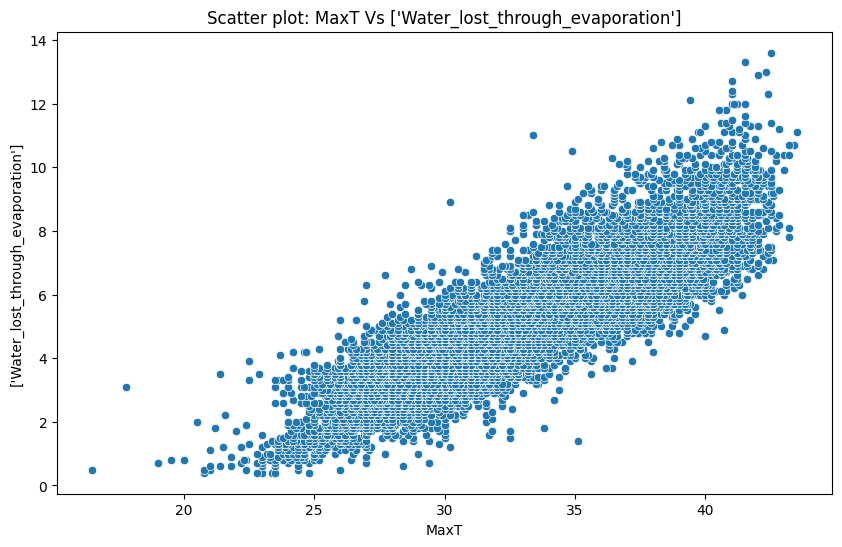

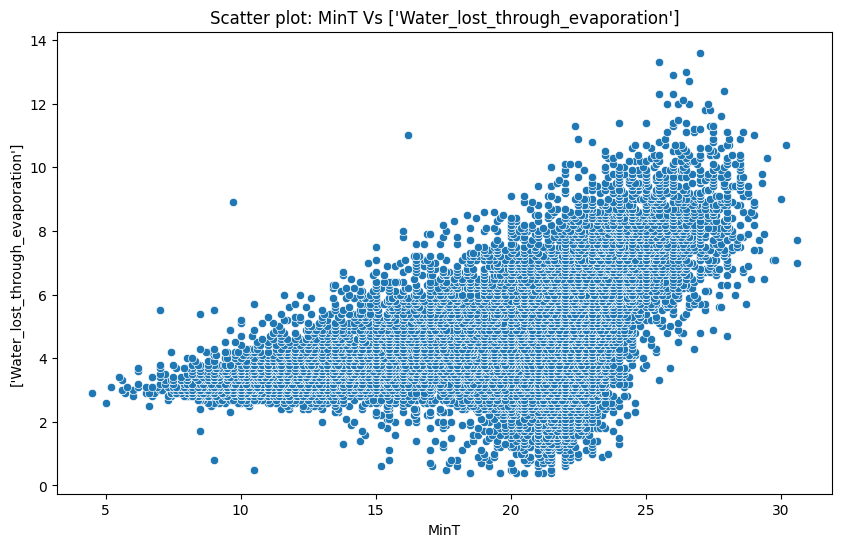

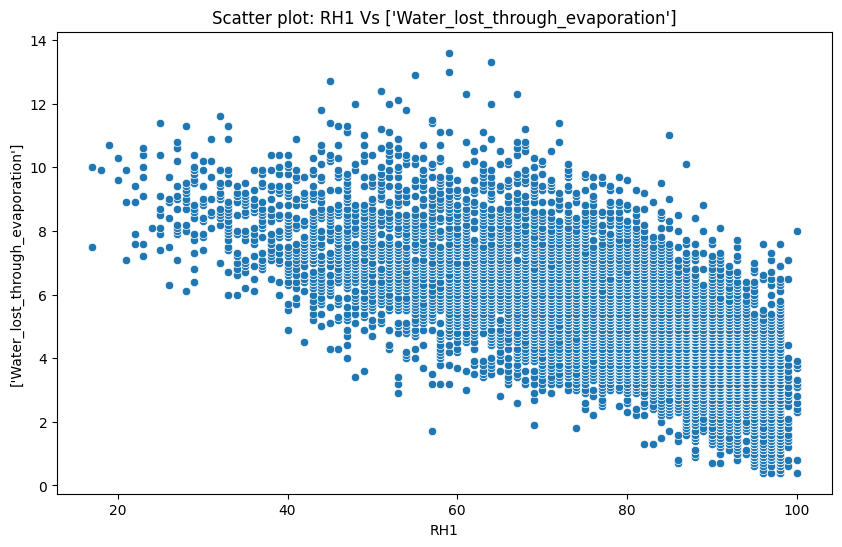

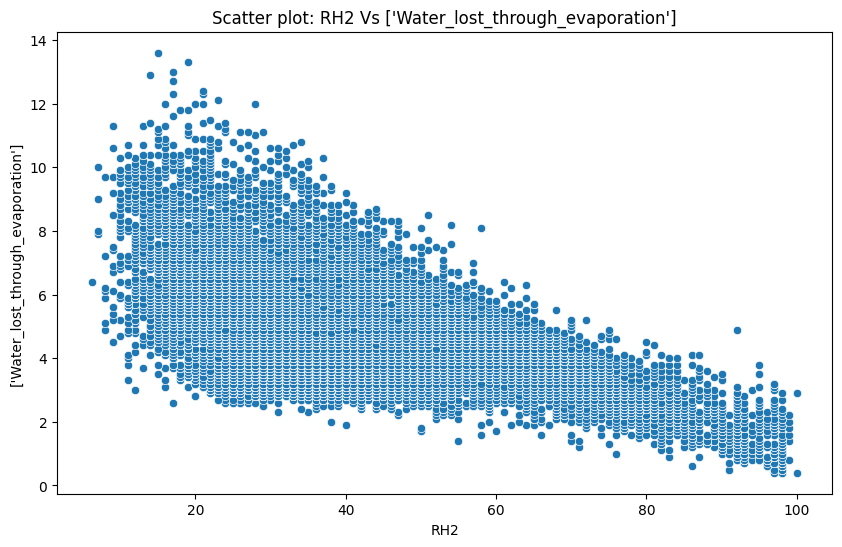

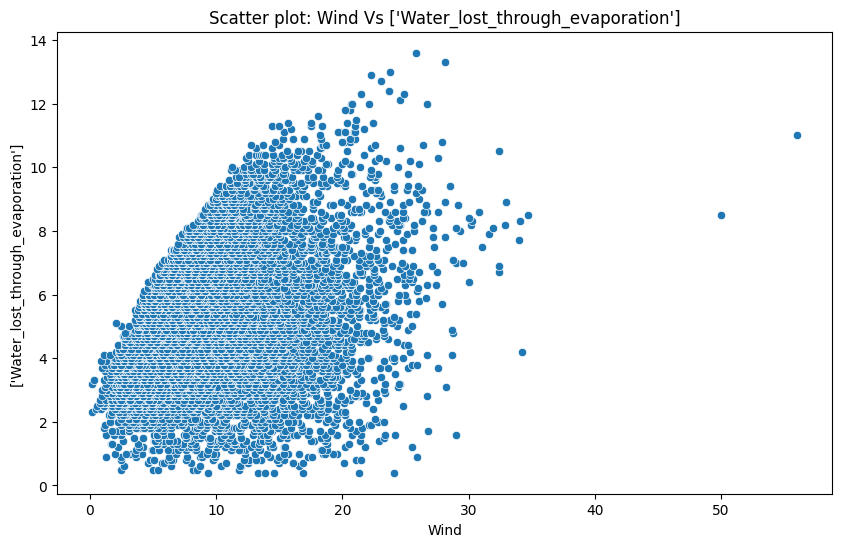

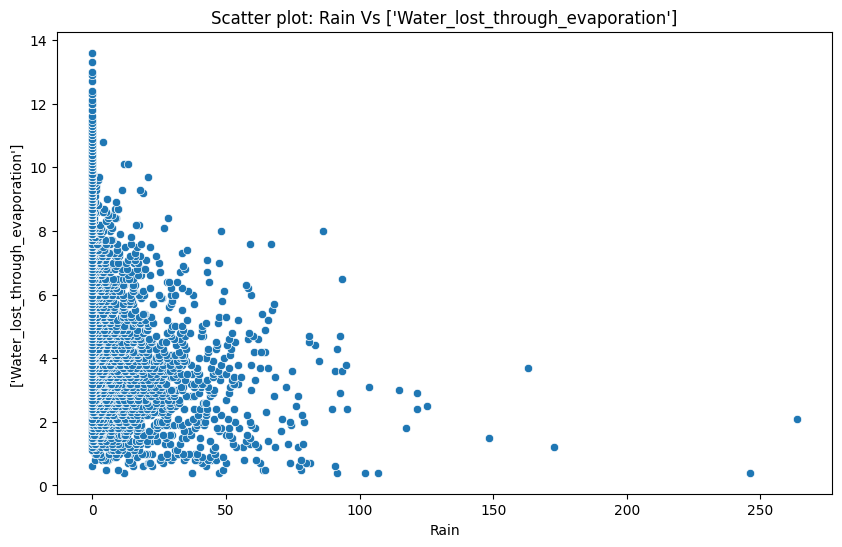

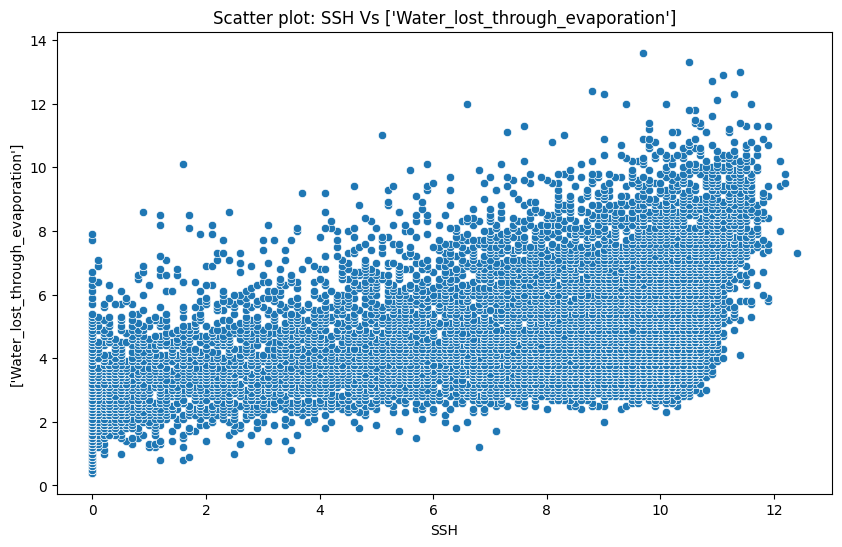

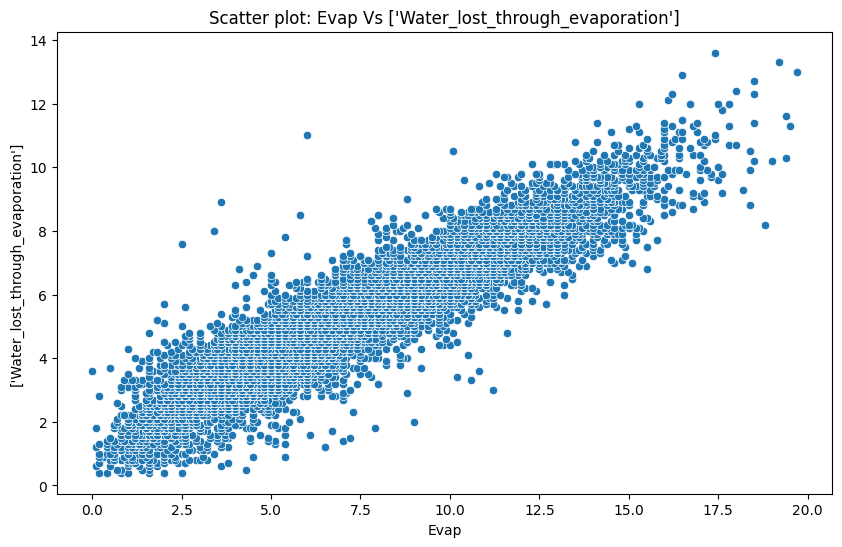

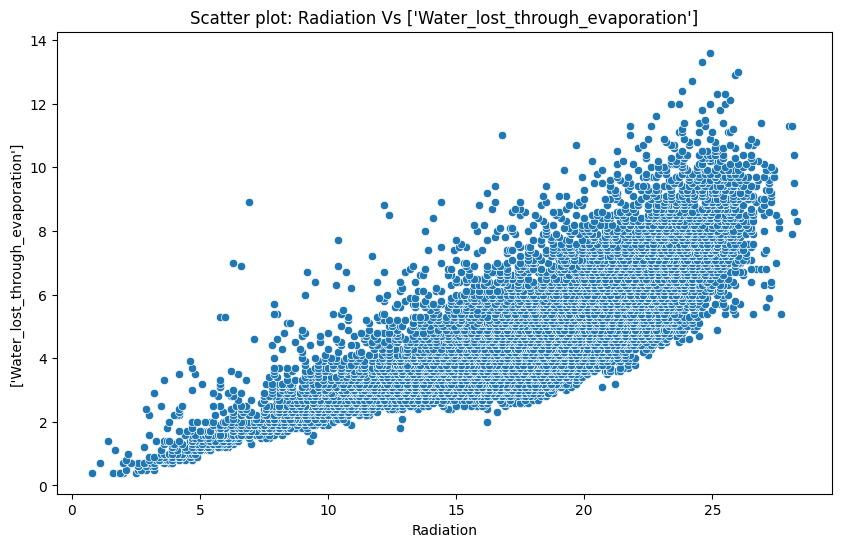

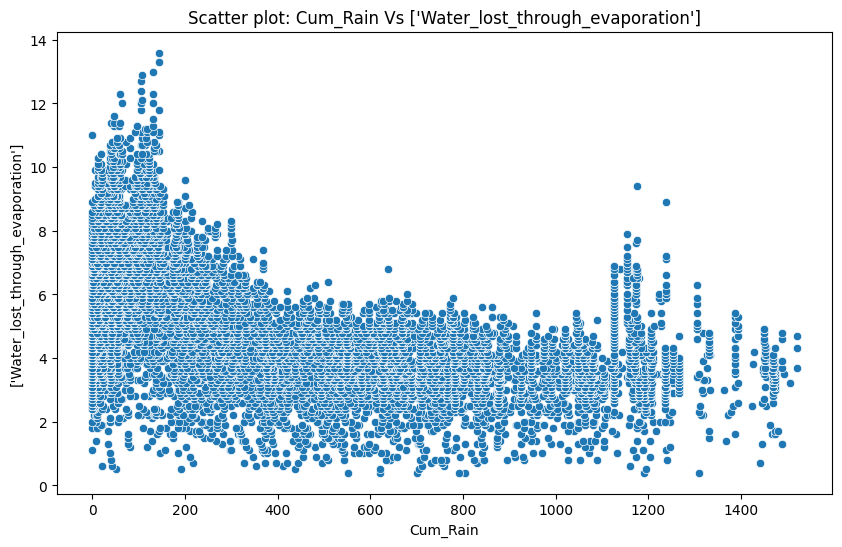

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['MaxT','MinT','RH1','RH2','Wind',	'Rain','SSH','Evap','Radiation','Cum_Rain']
target = ["Water_lost_through_evaporation"]
for f in features:
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=df[f], y=df['FAO56_ET'])
  plt.title(f'Scatter plot: {f} Vs {target}')
  plt.xlabel(f)
  plt.ylabel(target)
  plt.show()


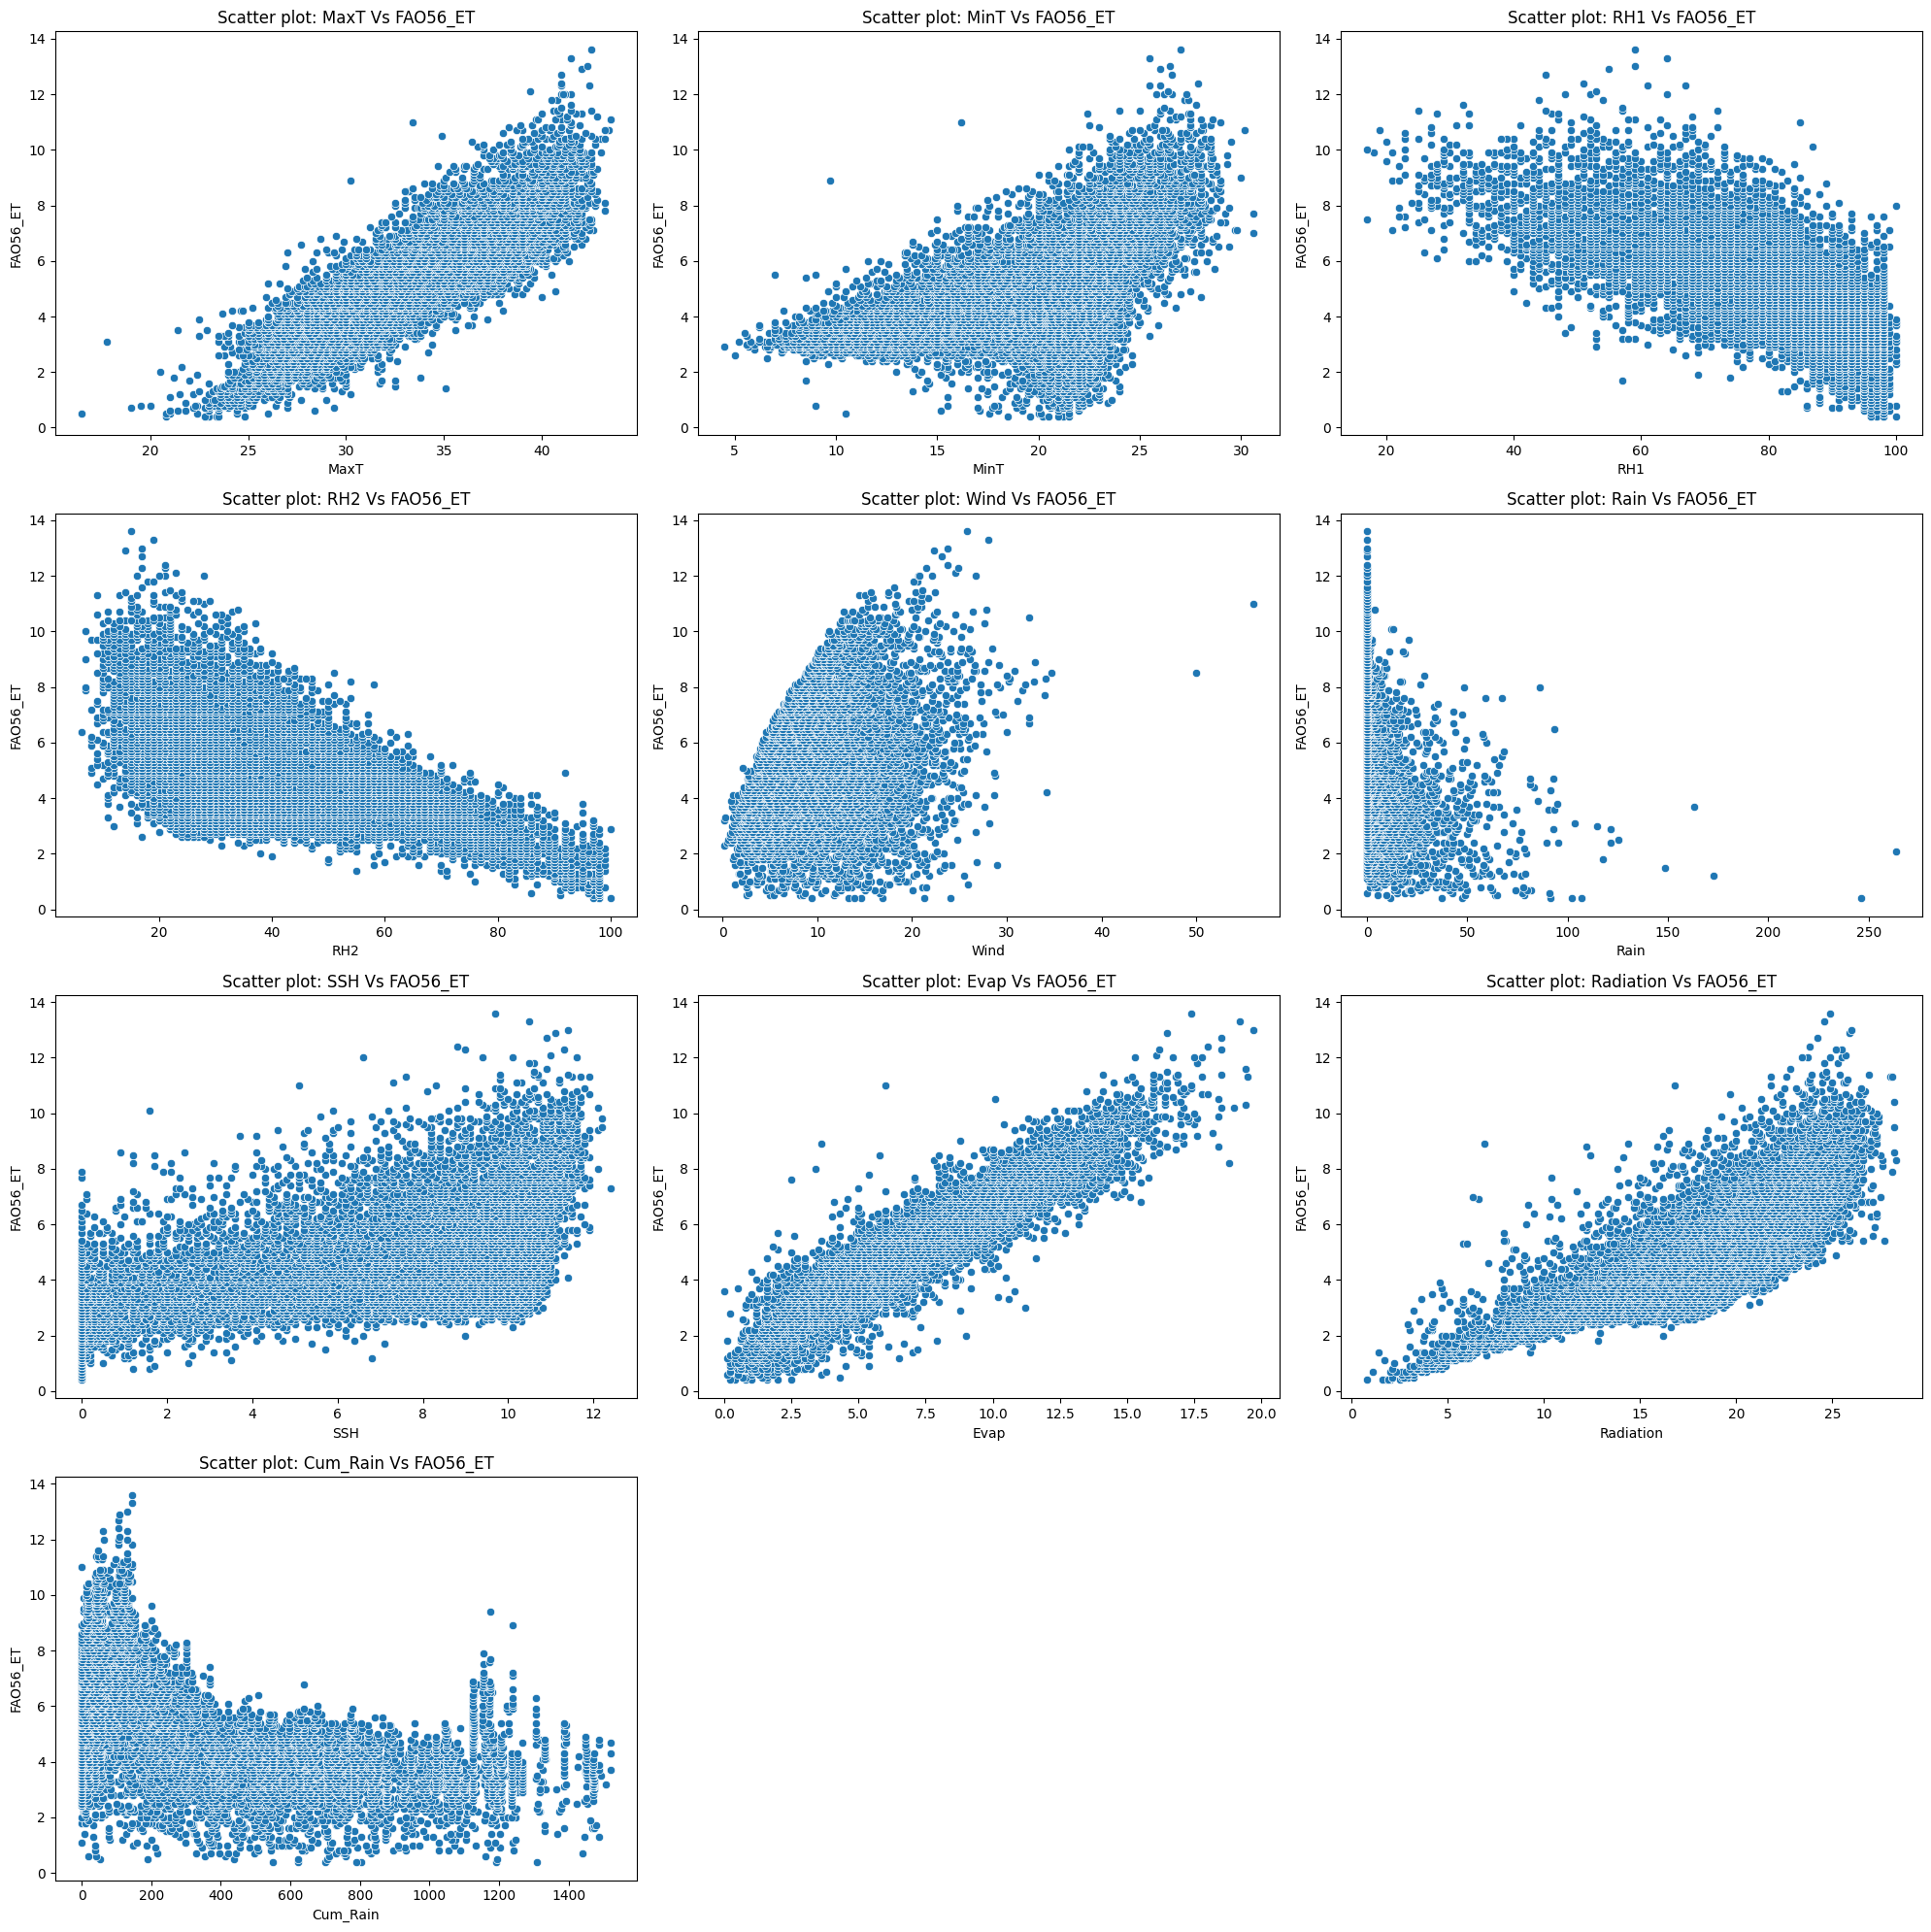

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH', 'Evap', 'Radiation', 'Cum_Rain']
target = "FAO56_ET"

# Calculate the number of rows needed
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # This ensures we cover all features

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot
for i, f in enumerate(features):
    sns.scatterplot(x=df[f], y=df[target], ax=axes[i])
    axes[i].set_title(f'Scatter plot: {f} Vs {target}')
    axes[i].set_xlabel(f)
    axes[i].set_ylabel(target)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
feature = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH', 'Evap', 'Radiation', 'Cum_Rain','FAO56_ET']

df[feature].corr()

,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,Cum_Rain,FAO56_ET
MaxT,1.000000,0.536908,-0.736751,-0.600751,0.129657,-0.151585,0.414846,0.876439,0.670821,-0.489400,0.867464
MinT,0.536908,1.000000,-0.328093,0.224644,0.490545,0.094926,-0.291376,0.421632,0.133390,-0.222613,0.505203
RH1,-0.736751,-0.328093,1.000000,0.604188,-0.115503,0.207295,-0.362631,-0.777785,-0.546423,0.434018,-0.730152
RH2,-0.600751,0.224644,0.604188,1.000000,0.214694,0.356251,-0.756722,-0.642417,-0.688859,0.375240,-0.607735
Wind,0.129657,0.490545,-0.115503,0.214694,1.000000,0.111851,-0.305902,0.314985,-0.054113,-0.258522,0.400122
Rain,-0.151585,0.094926,0.207295,0.356251,0.111851,1.000000,-0.333413,-0.174070,-0.298156,0.079631,-0.205166
SSH,0.414846,-0.291376,-0.362631,-0.756722,-0.305902,-0.333413,1.000000,0.481277,0.744162,-0.175350,0.457516
Evap,0.876439,0.421632,-0.777785,-0.642417,0.314985,-0.174070,0.481277,1.000000,0.686335,-0.512442,0.928333
Radiation,0.670821,0.133390,-0.546423,-0.688859,-0.054113,-0.298156,0.744162,0.686335,1.000000,-0.306812,0.773055
Cum_Rain,-0.489400,-0.222613,0.434018,0.375240,-0.258522,0.079631,-0.175350,-0.512442,-0.306812,1.000000,-0.497377


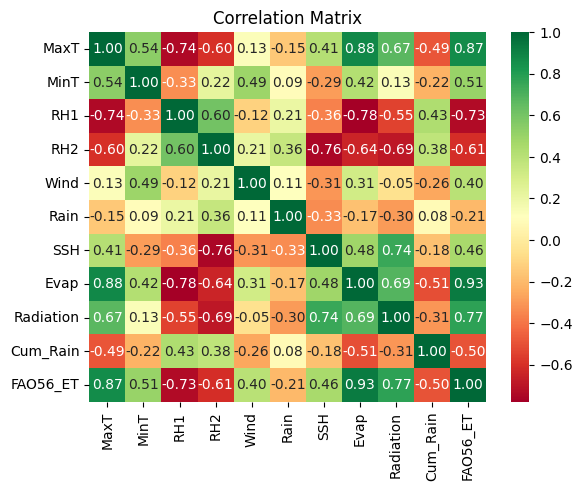

In [ ]:
corr_matrix = df[feature].corr()
sns.heatmap(corr_matrix, annot = True, cmap='RdYlGn', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df.isna().sum()

Station      0
Date         0
MaxT         0
MinT         0
RH1          0
RH2          0
Wind         0
Rain         0
SSH          0
Evap         0
Radiation    0
FAO56_ET     0
Lat          0
Lon          0
Cum_Rain     0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH', 'Radiation', 'Cum_Rain']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 0.1331885850597143
Root Mean Squared Error (RMSE): 0.36495011311097614


In [ ]:
y_test_n = pd.DataFrame(y_test.values, columns=['Actual'])
y_pred_n = pd.DataFrame(y_pred, columns=['Predicted'])

data_plot = pd.concat([y_test_n, y_pred_n], axis=1)

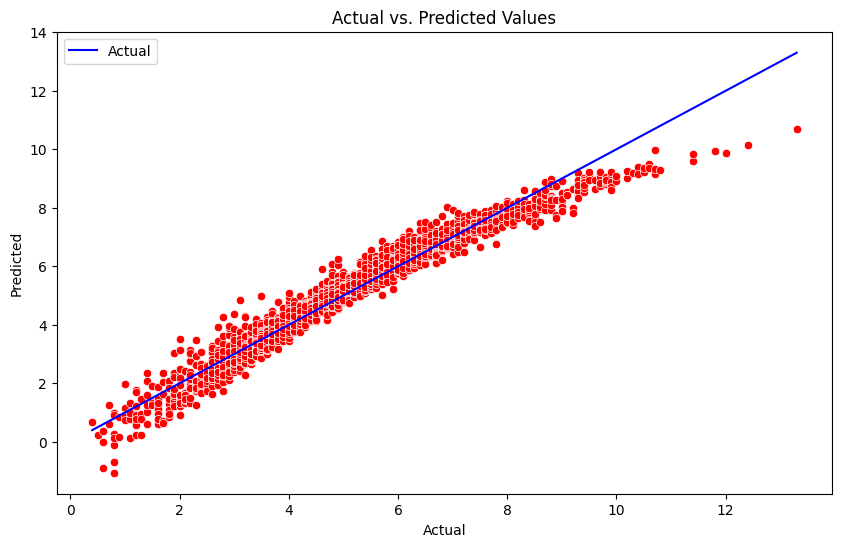

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Actual' values
data_plot_sorted = data_plot.sort_values(by='Actual')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_plot_sorted, x='Actual', y='Actual', label='Actual', color='blue', linestyle='-', marker=None)
sns.scatterplot(data=data_plot_sorted, x='Actual', y='Predicted', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()



In [ ]:
import statsmodels.api as sm

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH', 'Radiation', 'Cum_Rain']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term to the features
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train)
result = model.fit()

# Print the summary of the regression model
print(result.summary())

# Get the predicted values
y_pred = result.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("\n")
print("===================================================")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


                            OLS Regression Results                            
Dep. Variable:               FAO56_ET   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 3.047e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:18:54   Log-Likelihood:                -5078.9
No. Observations:               11881   AIC:                         1.018e+04
Df Residuals:                   11871   BIC:                         1.025e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4552      0.074    -33.398      0.0

In [ ]:
import statsmodels.api as sm

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'SSH', 'Radiation']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term to the features
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train)
result = model.fit()

# Print the summary of the regression model
print(result.summary())

# Get the predicted values
y_pred = result.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("\n")
print("===================================================")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


                            OLS Regression Results                            
Dep. Variable:               FAO56_ET   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 3.912e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:18:54   Log-Likelihood:                -5087.5
No. Observations:               11881   AIC:                         1.019e+04
Df Residuals:                   11873   BIC:                         1.025e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4082      0.072    -33.393      0.0

In [ ]:
import statsmodels.api as sm

features = ['MaxT', 'RH1',  'Wind', 'Radiation']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term to the features
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train)
result = model.fit()

# Print the summary of the regression model
print(result.summary())

# Get the predicted values
y_pred = result.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("\n")
print("===================================================")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

                            OLS Regression Results                            
Dep. Variable:               FAO56_ET   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 5.259e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:52:57   Log-Likelihood:                -6582.4
No. Observations:               11881   AIC:                         1.317e+04
Df Residuals:                   11876   BIC:                         1.321e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2894      0.071    -60.123      0.0

Alpha: 0.01 - R-squared: 0.9587284535597974 - RMSE: 0.3650912518417895
Alpha: 0.1 - R-squared: 0.9587259322912796 - RMSE: 0.36510240333841476
Alpha: 1 - R-squared: 0.958680375340764 - RMSE: 0.365303841745758
Alpha: 10 - R-squared: 0.9567515550369701 - RMSE: 0.3737328768716568
Alpha: 100 - R-squared: 0.9163597276722548 - RMSE: 0.5197371668658582


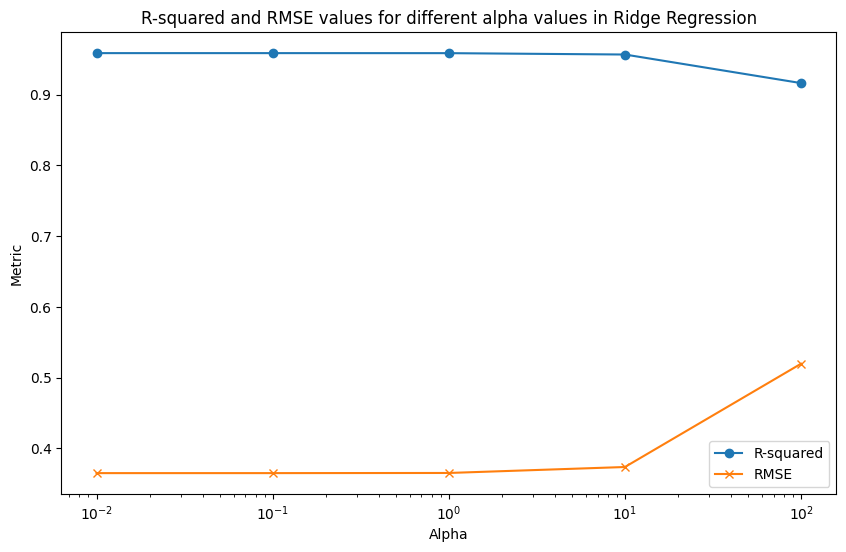

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Example DataFrame (uncomment and modify to load your actual data)
# df = pd.read_csv('your_data.csv')

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'SSH', 'Radiation']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge())
])

# Define a range of alpha values
alpha_values = [0.01, 0.1, 1, 10, 100]
r2_scores = []
rmse_scores = []

# Loop through each alpha value, fit the model, and calculate R-squared and RMSE
for alpha in alpha_values:
    pipeline.set_params(regressor__alpha=alpha)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    print(f'Alpha: {alpha} - R-squared: {r2} - RMSE: {rmse}')

# Plot R-squared values for each alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', label='R-squared')
plt.plot(alpha_values, rmse_scores, marker='x', label='RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Metric')
plt.title('R-squared and RMSE values for different alpha values in Ridge Regression')
plt.legend()


Alpha: 0.01 - R-squared: 0.9531432211974624 - RMSE: 0.3890113478818512
Alpha: 0.1 - R-squared: 0.6834099122788351 - RMSE: 1.0111712479773085
Alpha: 1 - R-squared: -0.00145828810311599 - RMSE: 1.7984256506073506
Alpha: 10 - R-squared: -0.00145828810311599 - RMSE: 1.7984256506073506
Alpha: 100 - R-squared: -0.00145828810311599 - RMSE: 1.7984256506073506


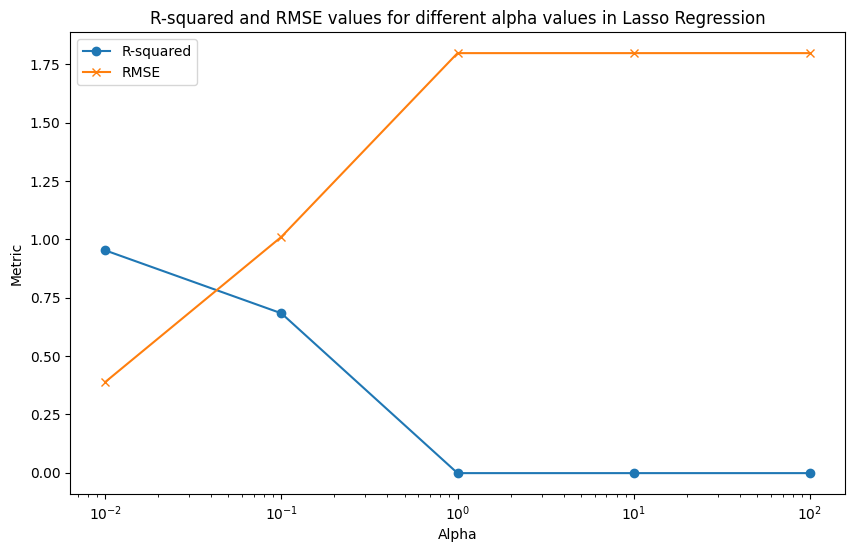

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Example DataFrame (uncomment and modify to load your actual data)
# df = pd.read_csv('your_data.csv')

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'SSH', 'Radiation']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', Lasso())
])

# Define a range of alpha values
alpha_values = [0.01, 0.1, 1, 10, 100]
r2_scores = []
rmse_scores = []

# Loop through each alpha value, fit the model, and calculate R-squared and RMSE
for alpha in alpha_values:
    pipeline.set_params(regressor__alpha=alpha)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    print(f'Alpha: {alpha} - R-squared: {r2} - RMSE: {rmse}')

# Plot R-squared and RMSE values for each alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', label='R-squared')
plt.plot(alpha_values, rmse_scores, marker='x', label='RMSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Metric')
plt.title('R-squared and RMSE values for different alpha values in Lasso Regression')
plt.legend()
plt.show()


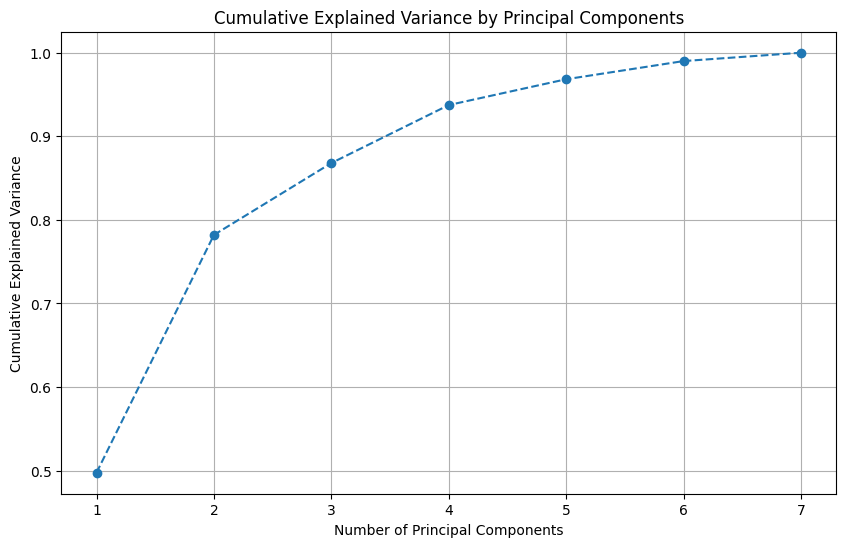

Principal Component 1: 0.4975
Principal Component 2: 0.2845
Principal Component 3: 0.0860
Principal Component 4: 0.0694
Principal Component 5: 0.0309
Principal Component 6: 0.0217
Principal Component 7: 0.0100
Cumulative Explained Variance: [0.49753132 0.78204484 0.86800646 0.93741092 0.96828256 0.9900211
 1.        ]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example DataFrame (uncomment and modify to load your actual data)
# df = pd.read_csv('your_data.csv')

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'SSH', 'Radiation']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

# Print explained variance ratio for each principal component
for i, variance in enumerate(explained_variance_ratio):
    print(f'Principal Component {i+1}: {variance:.4f}')

# Print cumulative explained variance
print(f'Cumulative Explained Variance: {cumulative_explained_variance}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example DataFrame (uncomment and modify to load your actual data)
# df = pd.read_csv('your_data.csv')

features = ['MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'SSH', 'Radiation']
target = 'FAO56_ET'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA and reduce to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a linear regression model using the first two principal components
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test_pca)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate F-statistic and p-value using statsmodels
X_test_pca_with_const = sm.add_constant(X_test_pca)
model = sm.OLS(y_test, X_test_pca_with_const)
results = model.fit()

f_stat = results.fvalue
f_pvalue = results.f_pvalue

# Print results
print(f'R-squared: {r2}')
print(f'F-statistic: {f_stat}')
print(f'P-value of F-statistic: {f_pvalue}')

# Optionally, you can print the summary of the regression model
print(results.summary())


R-squared: 0.9082335233587029
F-statistic: 14693.748957814269
P-value of F-statistic: 0.0
                            OLS Regression Results                            
Dep. Variable:               FAO56_ET   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:33:47   Log-Likelihood:                -2408.5
No. Observations:                2971   AIC:                             4823.
Df Residuals:                    2968   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------